### Deliverable 1: Preprocessing the Data for a Neural Network

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'])

In [4]:
# Determine the number of unique values in each column.
unique_counts = application_df.nunique()

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.groupby('APPLICATION_TYPE').size().sort_values(ascending=False)

<AxesSubplot:ylabel='Density'>

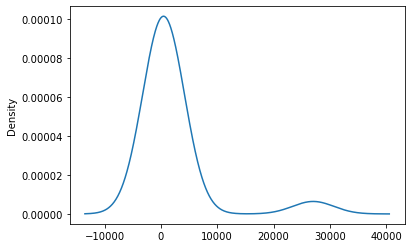

In [6]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts<100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2170        1
C1245        1
C1732        1
C2380        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

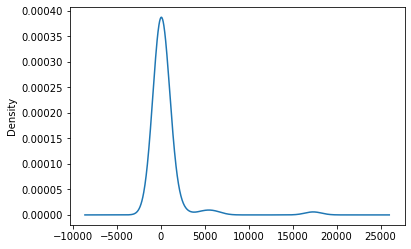

In [9]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_counts[classification_counts<1000].index)

# Replace in dataframe
for cls in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_df = pd.get_dummies(application_df)

In [12]:
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop("IS_SUCCESSFUL",1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
X_test_scaled

array([[ 0.01394306, -0.03099144, -0.06056052, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.06056052, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.06056052, ..., -0.07126932,
         0.02858365, -0.02858365],
       ...,
       [ 0.01394306, -0.03145581, -0.06056052, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03091486, -0.06056052, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.06056052, ..., -0.07126932,
         0.02858365, -0.02858365]])

# Identify noisy variables using Random Forest Classifier

In [16]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model
clf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [17]:
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
clf.feature_importances_

array([2.03154726e-04, 3.99309138e-01, 1.53059284e-03, 2.31814216e-02,
       1.67128567e-02, 1.42729138e-02, 1.96114285e-02, 2.69304420e-02,
       1.20683379e-02, 4.53523732e-03, 4.31874533e-03, 1.05446886e-03,
       1.30988759e-01, 1.10180650e-03, 1.25555296e-01, 6.68887199e-04,
       9.93436178e-05, 2.74745958e-04, 1.49189990e-02, 9.49449047e-03,
       1.79663172e-02, 1.97003549e-02, 7.85867417e-03, 1.88890170e-02,
       3.40427305e-03, 1.25669681e-03, 6.01543188e-05, 9.76843982e-03,
       1.15879552e-02, 2.98057770e-02, 2.75685623e-03, 5.12977565e-04,
       2.21273668e-02, 8.74552948e-03, 6.33655362e-03, 3.53178639e-03,
       6.34705204e-03, 2.86013206e-03, 6.51451742e-03, 7.36717604e-03,
       2.31008619e-03, 2.31826718e-03, 5.65091670e-04, 5.77882906e-04])

In [19]:
application_df.drop("IS_SUCCESSFUL",1).columns

Index(['STATUS', 'ASK_AMT', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'APPLICATION_TYPE_T9',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT

In [20]:
feature_importance = pd.Series(clf.feature_importances_, index=application_df.drop("IS_SUCCESSFUL",1).columns).sort_values(ascending=False)
feature_importance

ASK_AMT                         0.399309
AFFILIATION_CompanySponsored    0.130989
AFFILIATION_Independent         0.125555
ORGANIZATION_Association        0.029806
APPLICATION_TYPE_T5             0.026930
APPLICATION_TYPE_T10            0.023181
ORGANIZATION_Trust              0.022127
CLASSIFICATION_C2100            0.019700
APPLICATION_TYPE_T4             0.019611
CLASSIFICATION_Other            0.018889
CLASSIFICATION_C2000            0.017966
APPLICATION_TYPE_T19            0.016713
CLASSIFICATION_C1000            0.014919
APPLICATION_TYPE_T3             0.014273
APPLICATION_TYPE_T6             0.012068
USE_CASE_ProductDev             0.011588
USE_CASE_Preservation           0.009768
CLASSIFICATION_C1200            0.009494
INCOME_AMT_0                    0.008746
CLASSIFICATION_C3000            0.007859
INCOME_AMT_25000-99999          0.007367
INCOME_AMT_1M-5M                0.006515
INCOME_AMT_100000-499999        0.006347
INCOME_AMT_1-9999               0.006337
APPLICATION_TYPE

No handles with labels found to put in legend.


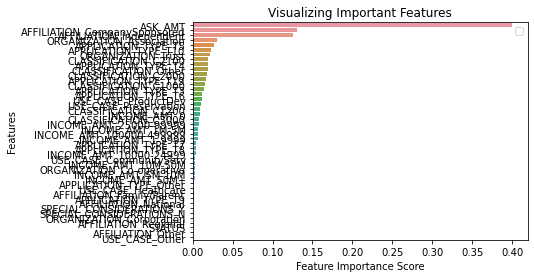

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_importance, y=feature_importance.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [22]:
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
# Drop features with less than 0.01 feature importance score
application_df_smooth = application_df.drop(feature_importance[feature_importance<0.005].index, axis=1)

In [24]:
# Split our preprocessed data into our features and target arrays
y = application_df_smooth["IS_SUCCESSFUL"].values
X = application_df_smooth.drop("IS_SUCCESSFUL",1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Initial Optimization Attempt (3 Hidden Layers - (5 > 500 > 100) neurons)

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_in_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 5
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 100

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_in_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# 3rd hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 125       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               3000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 53,326
Trainable params: 53,326
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch'
    )

SyntaxError: invalid syntax (<ipython-input-37-b64ac6d8bb76>, line 11)

In [29]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 0.6037 - accuracy: 0.6893

Epoch 00001: saving model to checkpoints\weights.01.hdf5
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5652 - accuracy: 0.7219

Epoch 00002: saving model to checkpoints\weights.02.hdf5
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5648 - accuracy: 0.7227

Epoch 00003: saving model to checkpoints\weights.03.hdf5
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7310

Epoch 00004: saving model to checkpoints\weights.04.hdf5
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7303

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5590 - accuracy: 0.7265

Epoch 00006: saving model to checkpoints\weights.06.hdf5
Epoch 7/50
804/804 [==============================] 

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5531 - accuracy: 0.7293
Loss: 0.553070068359375, Accuracy: 0.7293294668197632


### First Pass For Loop Optimization Attempt (3 Hidden Layers - 1-1000 neurons for each layer)

In [31]:
# Loop through several options to save best combination
import random
best_loss = 1
best_model_accuracy = 0
best_layer1_nodes = 0
best_layer2_nodes = 0
best_layer3_nodes = 0
for i in range(25):
    rand1 = random.randint(1,1000)
    rand2 = random.randint(1,1000)
    rand3 = random.randint(1,1000)
    # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
    number_in_features = len(X_train_scaled[0])
    hidden_nodes_layer1 = rand1
    hidden_nodes_layer2 = rand2
    hidden_nodes_layer3 = rand3

    nn = tf.keras.models.Sequential()

    # First hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_in_features, activation="relu"))

    # Second hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

    # 3rd hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Check the structure of the model
    nn.summary()

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])  

    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, epochs=10)

    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

    if model_accuracy > best_model_accuracy:
        best_model_accuracy = model_accuracy
        best_loss = model_loss
        best_layer1_nodes = rand1
        best_layer2_nodes = rand2
        best_layer3_nodes = rand3

8 - 1s - loss: 0.5548 - accuracy: 0.7310
Loss: 0.5548118948936462, Accuracy: 0.7309620976448059
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 692)               17300     
_________________________________________________________________
dense_65 (Dense)             (None, 623)               431739    
_________________________________________________________________
dense_66 (Dense)             (None, 302)               188448    
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 303       
Total params: 637,790
Trainable params: 637,790
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
804/804 [==============================] - 4s 5ms/step - loss: 0.5828 - accuracy: 0.7156
Epoch 2/10
804/804 [=============================

In [34]:
print(best_model_accuracy)

0.7321282625198364


In [35]:
print(rand1, rand2, rand3)

317 929 873


### Final Attempt Optimized Model with 100 Epochs (3 Hidden Layers - 317 > 929 > 873 neurons)

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_in_features = len(X_train_scaled[0])
hidden_nodes_layer1 = rand1
hidden_nodes_layer2 = rand2
hidden_nodes_layer3 = rand3

# Define the checkpoint path and filenames
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=804*5
    )

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_in_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# 3rd hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])  

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 355)               8875      
_________________________________________________________________
dense_113 (Dense)            (None, 925)               329300    
_________________________________________________________________
dense_114 (Dense)            (None, 878)               813028    
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 879       
Total params: 1,152,082
Trainable params: 1,152,082
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
804/804 [==============================] - 8s 9ms/step - loss: 0.5806 - accuracy: 0.7156
Epoch 2/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5589 - accuracy: 0.7292
Epoch 3/100
804/804 [==================

KeyboardInterrupt: 

In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharityOptimized.h5")